### Load in necessary libraries

In [1]:
import os
import sys
import gc
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
home = os.path.expanduser("~")
sys.path.append(f"{home}/Documents/projects/CarPriceRegression/Data_Process/scripts/")

In [3]:
from util import *
%load_ext autoreload
%autoreload 2

### Import all data 

In [4]:
DIRPATH = f"{home}/Documents/projects/CarPriceRegression/carPrice/"
EXT = ".csv"

In [5]:
data = readData(DIRPATH,EXT)

In [6]:
data.shape

(99187, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99187 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  int64  
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 7.6+ MB


In [8]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


### Observations:

* There are zero null values
* model and transmission are object type and the rest are numeric type 
* year, tax, and engineSize require some feature transformation

### Garbage Collect

In [9]:
gc.collect()
%reset -f out

Flushing output cache (2 entries)


-----

### Look at relationship among features

### Year

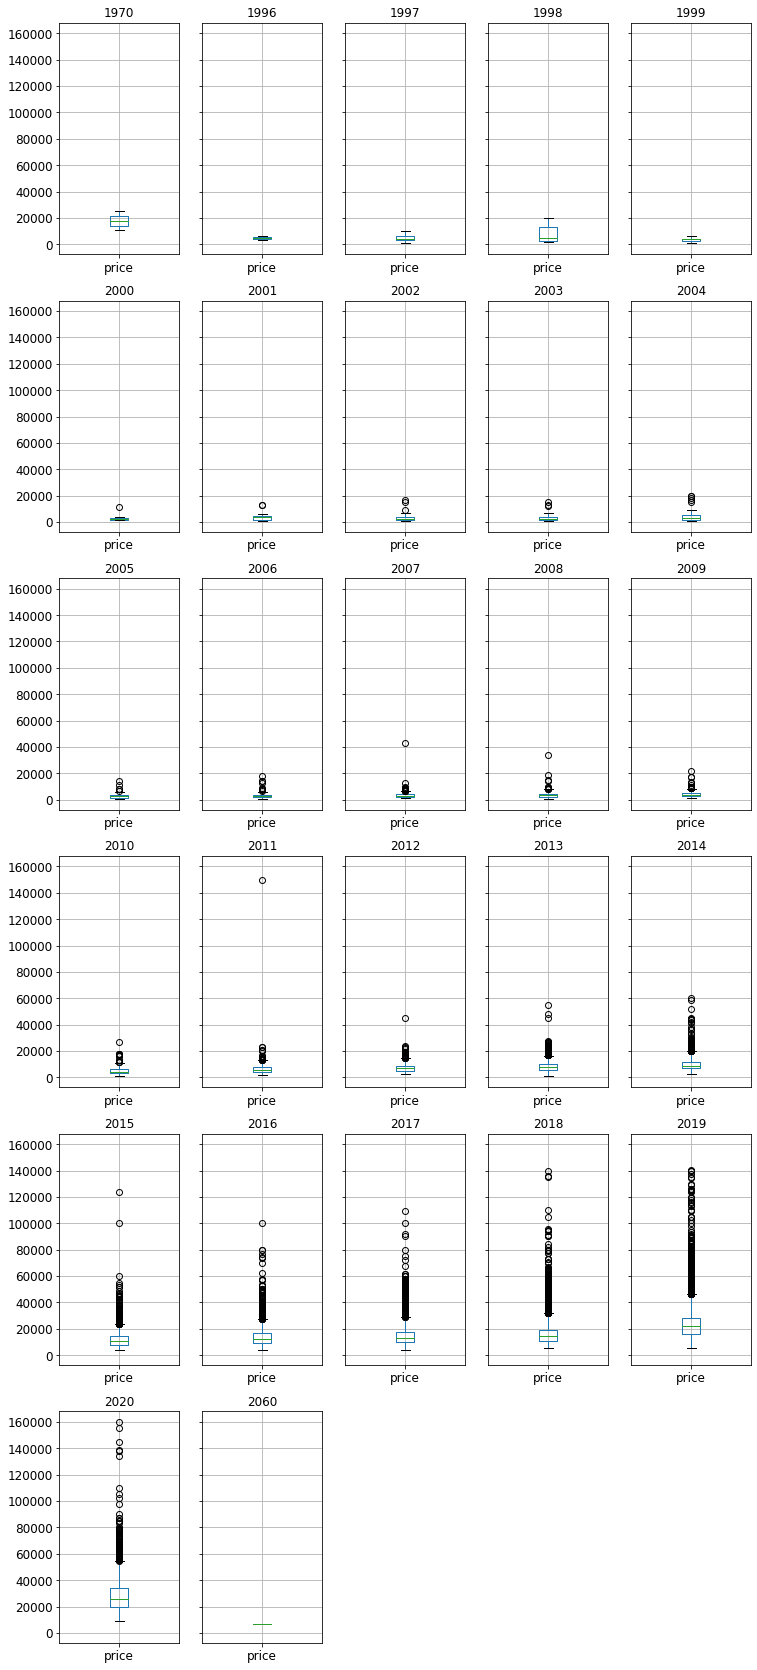

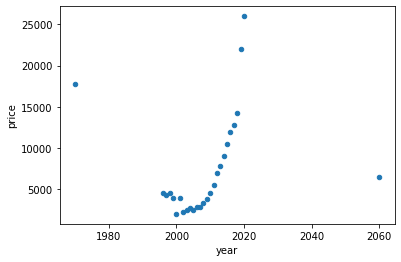

,year,price
26,2060,1
0,1970,2
1,1996,2
2,1997,4
4,1999,6
3,1998,8
5,2000,9
6,2001,20
7,2002,31
8,2003,34


In [10]:
EDA_CAT_func("year","price",data,12,(12,30),(6,5))[:10]

### observations:
   * remove entries that are in 2060 and years <=2000 (simply not a lot of datapoints) 
   * overall price increases with year which made sense 
   * There are a lot of outliers as well. 
   * probably good idea to turn this feature into a categorical feature

### mileage

* Look at scatter plot relationship

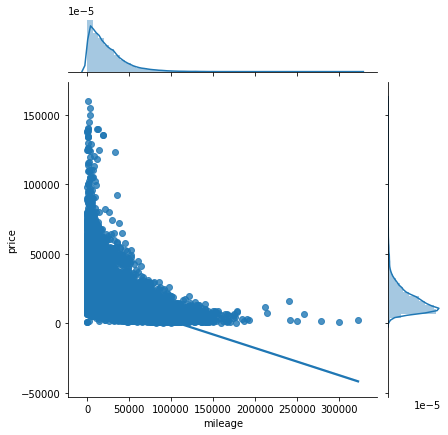

In [11]:
sns.jointplot(data=data,
             x="mileage",
             y="price",
             kind="reg")
plt.show()

### It might better to turn milage into categorical features to get a better relationship

### We will bin the features into 6 categories:
  * 0: <= 3000
  * 1: <= 10000 
  * 2: <= 30000
  * 3: <= 60000
  * 4: <= 100000
  * 5: > 100000

In [12]:
mil_thresholds = {(0,3000):"0",
             (3001,10000):"1",
             (10001,30000):"2",
             (30001,60000):"3",
             (60001,100000):"4",
             (100001,350000):"5"}

In [16]:
data["mil_cat"] = data.mileage.apply(lambda x: binning_func(x, mil_thresholds))

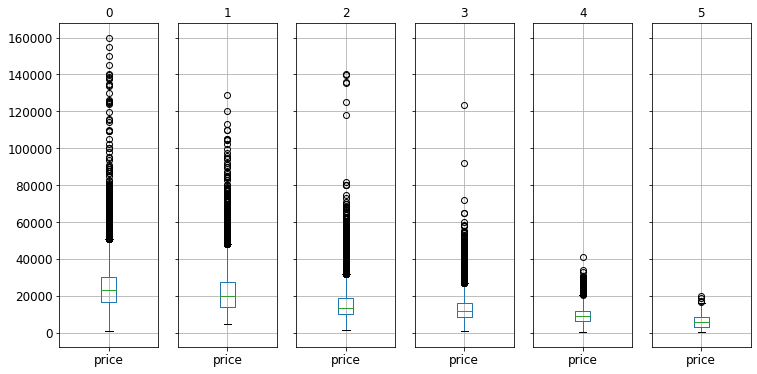

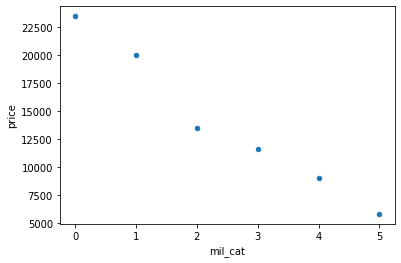

,mil_cat,price
5,5,804
4,4,5319
0,0,11218
1,1,20530
3,3,22015
2,2,39301


In [24]:
EDA_CAT_func("mil_cat","price",data,12,(12,6),(1,6))

### Much better and see a clear indication of price drop as mileage goes down

### tax